In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math as math
import itertools
import os


In [4]:
# Define a function that takes a text file, gets rid of the first 40 lines, and then breaks the file into
# segment, where each segment is for one event (script specifically for lhe file with 11,000 events)

def read(filename):

    group_size = 8

    with open(filename, 'r') as file:
        lines = file.readlines()

        lines = lines[40:88039]

    events = []

    for i in range(0, len(lines), group_size):
        event = lines[i:i+group_size]
        events.append(event)

    return events

In [5]:
# Script for reading in an array created by the read() function and counting how many interactions are gg, gq

array = read('test.lhe')

gg, gq = 0, 0

print(len(array))

for i in range(len(array)-1):

    if array[i][1][2] == '6':
        gg = gg + 1

    else:
        gq = gq + 1

print(gg, gq)

8001
1440 6560


In [6]:
# Define a function that reads all the files in a folder, uses the 'read' function to make an array
# for each file, and then flattens those arrays into one big array

def combine(dir):

    directory = dir
    filenames = os.listdir(directory)

    bigEvents = []

    for filename in filenames:

        file_path = os.path.join(directory, filename)

        bigEvents.append(read(file_path))

    return list(itertools.chain(*bigEvents))

In [7]:
# Make big arrays for each COME, each Ms (10 arrays)

_13TeV_50Ms_ = combine('mc23_13TeV.100001.STRPy8EG_STR_Ms05000.evgen.TXT.e0000')
_13TeV_55Ms_ = combine('mc23_13TeV.100002.STRPy8EG_STR_Ms05500.evgen.TXT.e0000')
_13TeV_60Ms_ = combine('mc23_13TeV.100003.STRPy8EG_STR_Ms06000.evgen.TXT.e0000')
_13TeV_65Ms_ = combine('mc23_13TeV.100004.STRPy8EG_STR_Ms06500.evgen.TXT.e0000')
_13TeV_70Ms_ = combine('mc23_13TeV.100005.STRPy8EG_STR_Ms07000.evgen.TXT.e0000')

_13p6TeV_50Ms_ = combine('mc23_13p6TeV.100001.STRPy8EG_STR_Ms05000.evgen.TXT.e0000')
_13p6TeV_55Ms_ = combine('mc23_13p6TeV.100002.STRPy8EG_STR_Ms05500.evgen.TXT.e0000')
_13p6TeV_60Ms_ = combine('mc23_13p6TeV.100003.STRPy8EG_STR_Ms06000.evgen.TXT.e0000')
_13p6TeV_65Ms_ = combine('mc23_13p6TeV.100004.STRPy8EG_STR_Ms06500.evgen.TXT.e0000')
_13p6TeV_70Ms_ = combine('mc23_13p6TeV.100005.STRPy8EG_STR_Ms07000.evgen.TXT.e0000')

In [8]:
# We now have 10 arrays of length 110000, each element is an LHE entry for each collision.
# We write a function that looks at every element and creates arrays for mjgamma, px_jet, px_photon, py_jet, py_photon, pz_jet, pz_photon, p_jet, p_photon, E_jet, E_photon, pT_jet, pT_photon, theta_jet, theta_photon, phi_jet, phi_photon, as well as p1, p2, E1, E2 for initial partons

def pythag(x1, x2, x3):

    return math.sqrt(x1**2 + x2**2 + x3**2)

def sort(array):

    p1, p2, E1, E2, m_initial = [], [], [], [], []

    mjgamma, px_jet, px_photon, py_jet, py_photon, pz_jet, pz_photon, p_jet, p_photon, E_jet, E_photon, pT_jet, pT_photon, theta_jet, theta_photon, phi_jet, phi_photon = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

    for i in range(len(array)):

        p1.append(array[i][2][46:59])      # momentum of first parton (entirely in the z)
        p1[i] = float(p1[i])/1000
        p2.append(array[i][3][46:59])      # momentum of second parton
        p2[i] = float(p2[i])/1000
        E1.append(array[i][2][60:73])      # energy of first parton
        E1[i] = float(E1[i])/1000
        E2.append(array[i][3][60:73])      # energy of second parton
        E2[i] = float(E2[i])/1000

        m_initial.append( math.sqrt( (E1[i]+E2[i])**2 - (p1[i]+p2[i])**2 ) )  # initial mass of two incoming partons

        if array[i][5][0:2] == '22':                # sometimes the fifth line has the photon...

            px_jet.append(array[i][4][18:31])       # x momentum
            px_jet[i] = float(px_jet[i])/1000

            px_photon.append(array[i][5][18:31])
            px_photon[i] = float(px_photon[i])/1000

            py_jet.append(array[i][4][32:45])       # y momentum
            py_jet[i] = float(py_jet[i])/1000

            py_photon.append(array[i][5][32:45])
            py_photon[i] = float(py_photon[i])/1000

            pz_jet.append(array[i][4][46:59])       # z momentum
            pz_jet[i] = float(pz_jet[i])/1000

            pz_photon.append(array[i][5][46:59])
            pz_photon[i] = float(pz_photon[i])/1000

            E_jet.append(array[i][4][60:73])        # Energy
            E_jet[i] = float(E_jet[i])/1000

            E_photon.append(array[i][5][60:73])
            E_photon[i] = float(E_photon[i])/1000

        else:                                        # ...sometimes the fourth does

            px_jet.append(array[i][5][18:31])       # x momentum
            px_jet[i] = float(px_jet[i])/1000

            px_photon.append(array[i][4][18:31])
            px_photon[i] = float(px_photon[i])/1000

            py_jet.append(array[i][5][32:45])       # y momentum
            py_jet[i] = float(py_jet[i])/1000

            py_photon.append(array[i][4][32:45])
            py_photon[i] = float(py_photon[i])/1000

            pz_jet.append(array[i][5][46:59])       # z momentum
            pz_jet[i] = float(pz_jet[i])/1000

            pz_photon.append(array[i][4][46:59])
            pz_photon[i] = float(pz_photon[i])/1000

            E_jet.append(array[i][5][60:73])        # energy
            E_jet[i] = float(E_jet[i])/1000

            E_photon.append(array[i][4][60:73])
            E_photon[i] = float(E_photon[i])/1000

        p_jet.append(pythag(px_jet[i], py_jet[i], pz_jet[i]))               # total momenta
        p_photon.append(pythag(px_photon[i], py_photon[i], pz_photon[i]))

        pT_jet.append( math.sqrt( px_jet[i]**2 + py_jet[i]**2 ) )            # tranverse momenta
        pT_photon.append( math.sqrt( px_photon[i]**2 + py_photon[i]**2 ) )

        theta_photon.append( math.acos(pz_photon[i]/p_photon[i]) )

        theta_jet.append( math.acos(pz_jet[i]/p_jet[i]) )

        phi_photon.append( math.atan(py_photon[i]/px_photon[i]) )
        if py_photon[i] < 0 and px_photon[i] < 0:
            phi_photon[i] = phi_photon[i] + math.pi
        if py_photon[i] < 0 < px_photon[i]:
            phi_photon[i] = phi_photon[i] + 2*math.pi
        if px_photon[i] < 0 < py_photon[i]:
            phi_photon[i] = math.pi + phi_photon[i]

        phi_jet.append( math.atan(py_jet[i]/px_jet[i]) )
        if py_jet[i] < 0 and px_jet[i] < 0:
            phi_jet[i] = phi_jet[i] + math.pi
        if py_jet[i] < 0 < px_jet[i]:
            phi_jet[i] = phi_jet[i] + 2*math.pi
        if px_jet[i] < 0 < py_jet[i]:
            phi_jet[i] = math.pi + phi_jet[i]

        pz = pz_jet[i] + pz_photon[i]    # invariant mass of resonance
        py = py_jet[i] + py_photon[i]
        px = px_jet[i] + px_photon[i]
        p = pythag(px, py, pz)

        E = E_jet[i] + E_photon[i]

        mjgamma.append(math.sqrt(E**2 - p**2))

    return mjgamma, px_jet, px_photon, py_jet, py_photon, pz_jet, pz_photon, p_jet, p_photon, E_jet, E_photon, pT_jet, pT_photon, theta_jet, theta_photon, phi_jet, phi_photon, E1, E2, p1, p2, m_initial

In [9]:
# Make histogram function

def histogram(photon, jet, names, labels, style, stringscale):

    fig, ax = plt.subplots()
    ax.hist(jet, bins=100, color='white', edgecolor='red', alpha=1)

    binsize = ( max(jet)-min(jet) )
    string = str(binsize)

    ax.set_xlabel(labels + ', jet')
    ax.set_ylabel('Entries per ' + string + ' rad bin')
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

    if style == 'log':
        ax.set_yscale('log')

    mean = np.mean(jet)
    std_dev = np.std(jet)
    num_entries = len(jet)

    ax.text(0.92, 0.92, f"Mean: {mean:.2f}\nStd Dev: {std_dev:.2f}\nEntries: {num_entries}\nNumber of Bins: {100}", \
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))

    plt.savefig('./Histograms/' + stringscale + names + '_jet.pdf',dpi=100,bbox_inches='tight',format='pdf')
    plt.show()
    plt.clf()

    fig, ax = plt.subplots()
    ax.hist(photon, bins=100, color='white', edgecolor='blue', alpha=1)

    binsize = ( max(photon)-min(photon) )
    string = str(binsize)

    ax.set_xlabel(labels + ', photon')
    ax.set_ylabel('Entries per ' + string + ' rad bin')
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

    if style == 'log':
        ax.set_yscale('log')

    mean = np.mean(photon)
    std_dev = np.std(photon)
    num_entries = len(photon)

    ax.text(0.92, 0.92, f"Mean: {mean:.2f}\nStd Dev: {std_dev:.2f}\nEntries: {num_entries}\nNumber of Bins: {100}", \
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))

    plt.savefig('./Histograms/' + stringscale + names + '_photon.pdf',dpi=100,bbox_inches='tight',format='pdf')
    plt.show()
    plt.clf()

In [10]:
# function for getting invariant masses and angle deltas

def moreArray(array, angleArray, arrayLabel, angleLabel, arrayName, angleName, stringscale, style):

    fig, ax = plt.subplots()
    ax.hist(array, bins=100, color='white', edgecolor='green', alpha=1)

    binsize = ( max(array)-min(array) )*10
    string = str(binsize)

    ax.set_xlabel(arrayLabel)
    ax.set_ylabel('Entries per ' + string + ' GeV bin')
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

    if style == 'log':
        ax.set_yscale('log')

    mean = np.mean(array)
    std_dev = np.std(array)
    num_entries = len(array)

    ax.text(0.92, 0.92, f"Mean: {mean:.2f}\nStd Dev: {std_dev:.2f}\nEntries: {num_entries}\nNumber of Bins: {100}", \
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))

    plt.savefig('./Histograms/'+stringscale+arrayName,dpi=100,bbox_inches='tight',format='pdf')
    plt.show()
    plt.clf()


    fig, ax = plt.subplots()
    ax.hist(angleArray, bins=100, color='white', edgecolor='green', alpha=1)

    binsize = ( max(angleArray)-min(angleArray) )/100
    string = str(binsize)

    ax.set_xlabel(angleLabel)
    ax.set_ylabel('Entries per ' + string + ' rad bin')
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

    if style == 'log':
        ax.set_yscale('log')

    mean = np.mean(angleArray)
    std_dev = np.std(angleArray)
    num_entries = len(angleArray)

    ax.text(0.92, 0.92, f"Mean: {mean:.2f}\nStd Dev: {std_dev:.2f}\nEntries: {num_entries}\nNumber of Bins: {100}", \
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))

    plt.savefig('./Histograms/'+stringscale+angleName,dpi=100,bbox_inches='tight',format='pdf')
    plt.show()
    plt.clf()

In [51]:
mjgamma5, px_jet, px_photon, py_jet, py_photon, pz_jet, pz_photon, p_jet, p_photon, E_jet, E_photon, pT_jet, pT_photon, theta_jet, theta_photon, phi_jet, phi_photon, E1, E2, p1, p2, m_initial = sort(_13p6TeV_70Ms_)   # sort the array

In [105]:
# get del phi and del theta

del_phi, del_theta = [], []

for i in range(len(phi_jet)):

    del_phi.append( abs(phi_jet[i]-phi_photon[i]) )
    del_theta.append( theta_jet[i] - theta_photon[i] )

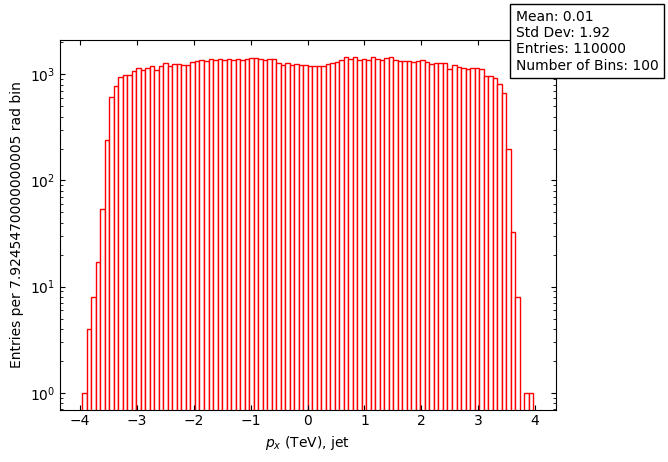

<Figure size 640x480 with 0 Axes>

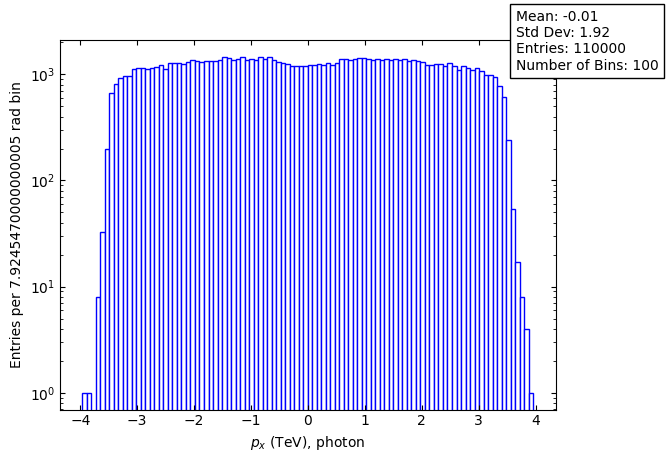

<Figure size 640x480 with 0 Axes>

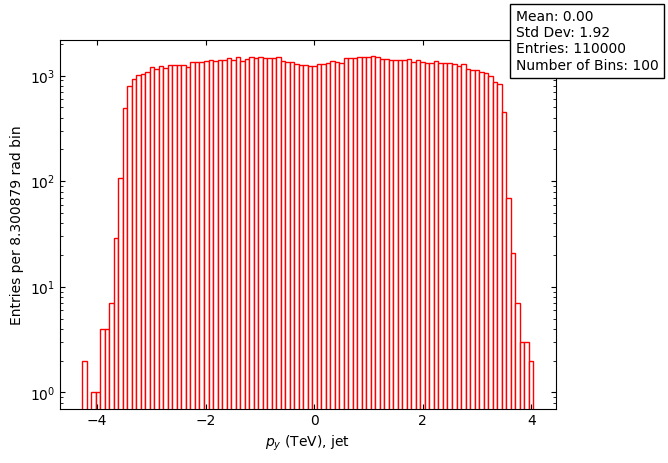

<Figure size 640x480 with 0 Axes>

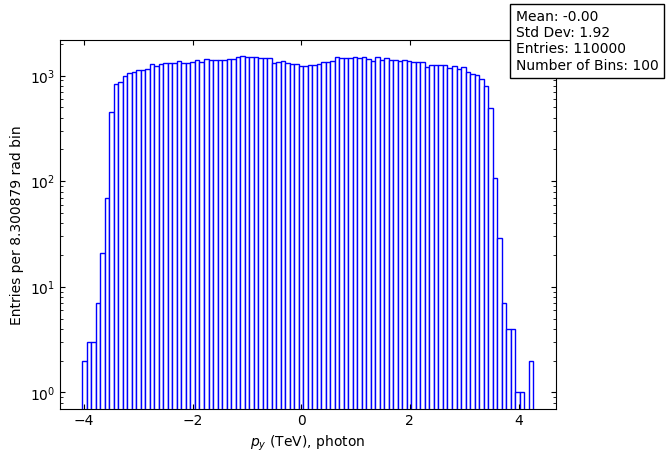

<Figure size 640x480 with 0 Axes>

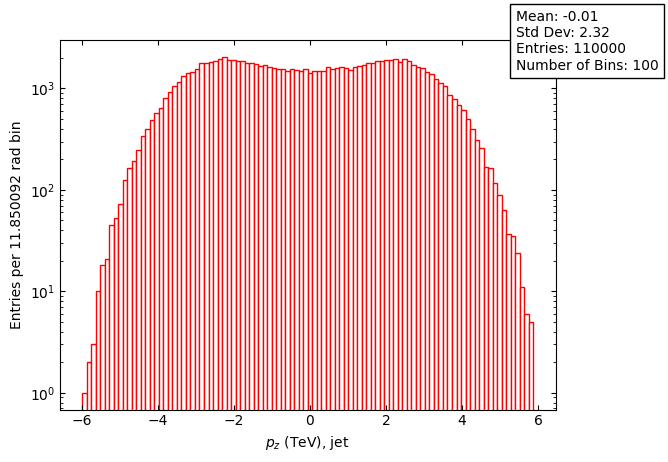

<Figure size 640x480 with 0 Axes>

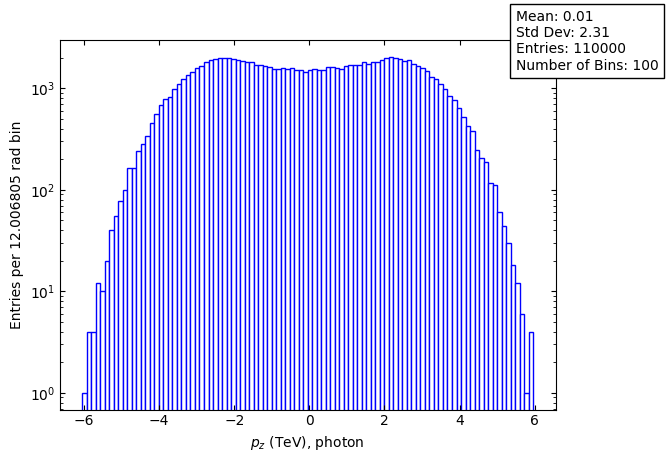

<Figure size 640x480 with 0 Axes>

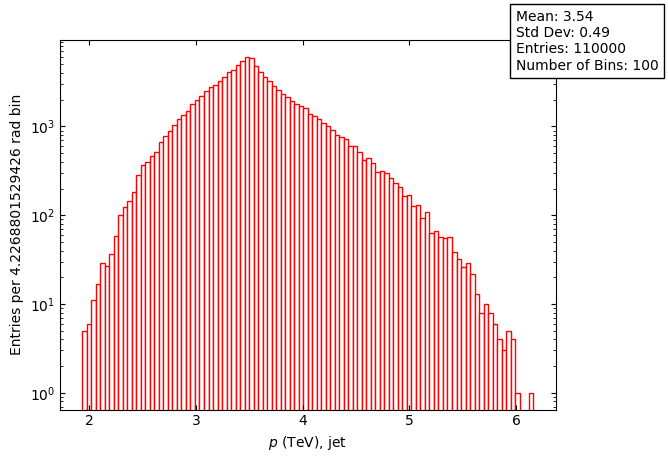

<Figure size 640x480 with 0 Axes>

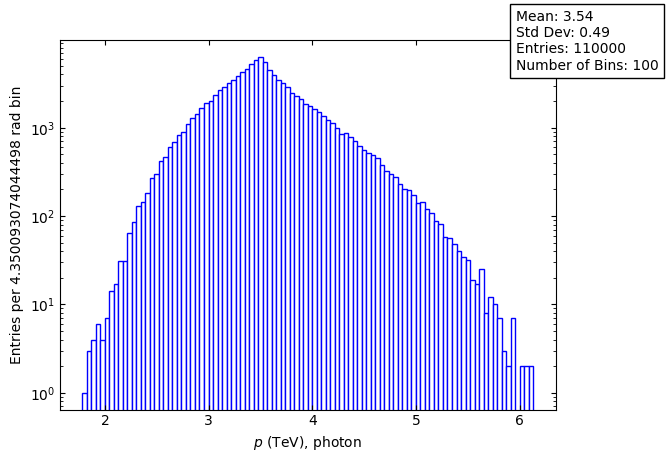

<Figure size 640x480 with 0 Axes>

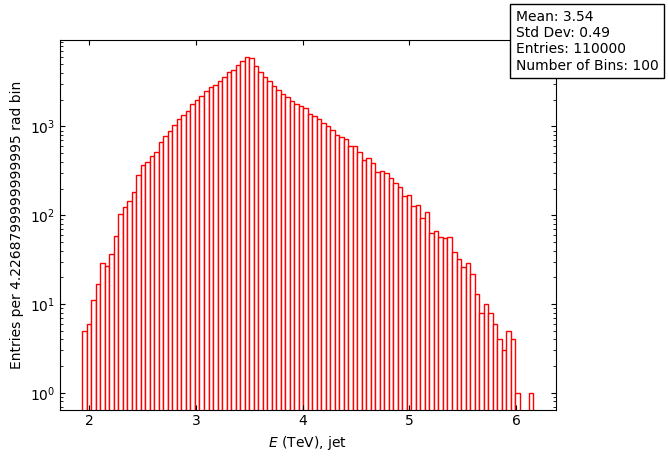

<Figure size 640x480 with 0 Axes>

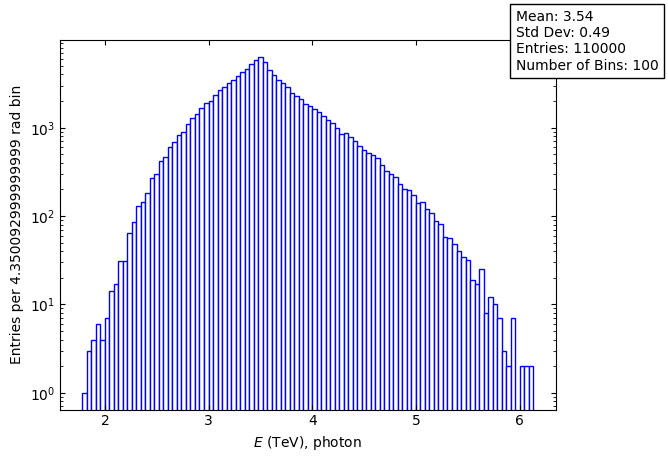

<Figure size 640x480 with 0 Axes>

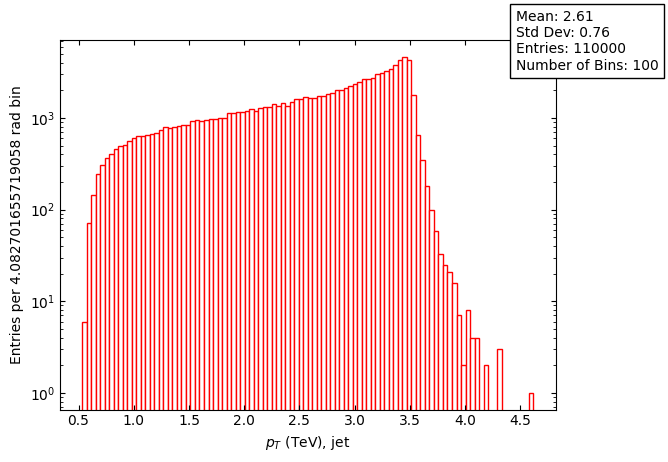

<Figure size 640x480 with 0 Axes>

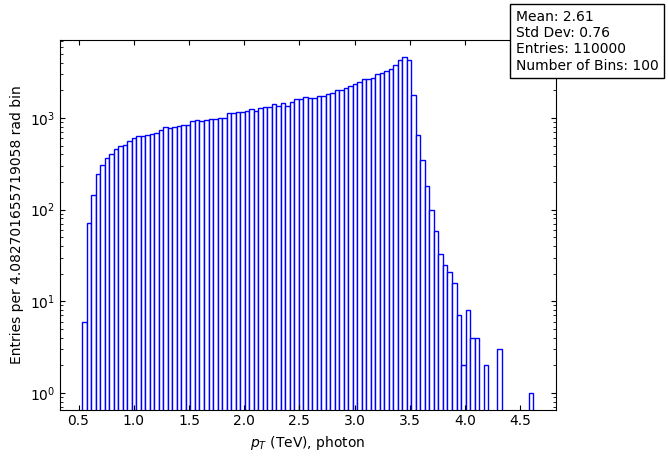

<Figure size 640x480 with 0 Axes>

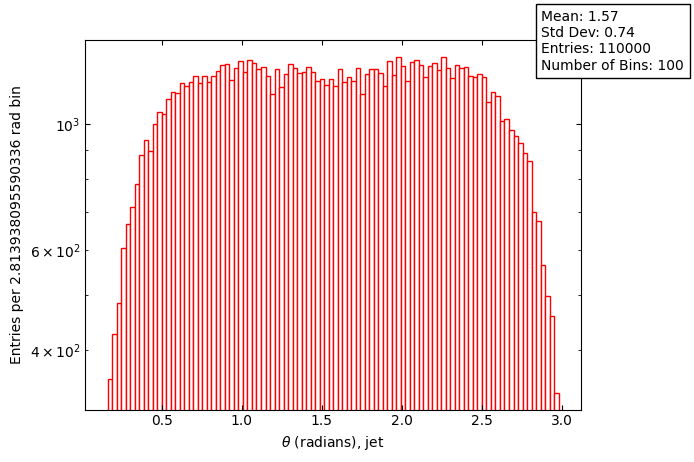

<Figure size 640x480 with 0 Axes>

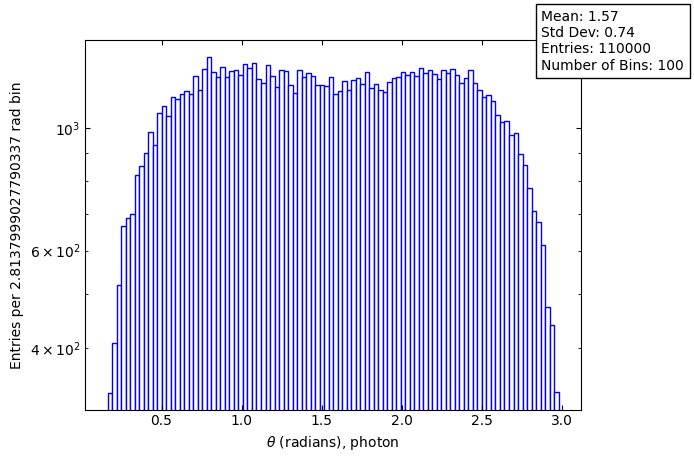

<Figure size 640x480 with 0 Axes>

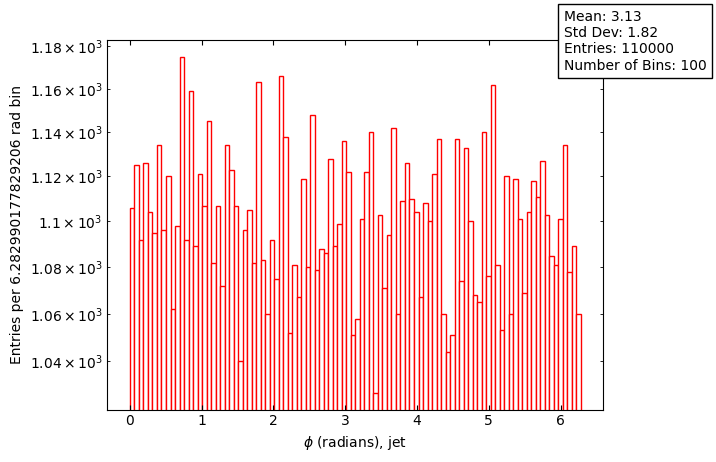

<Figure size 640x480 with 0 Axes>

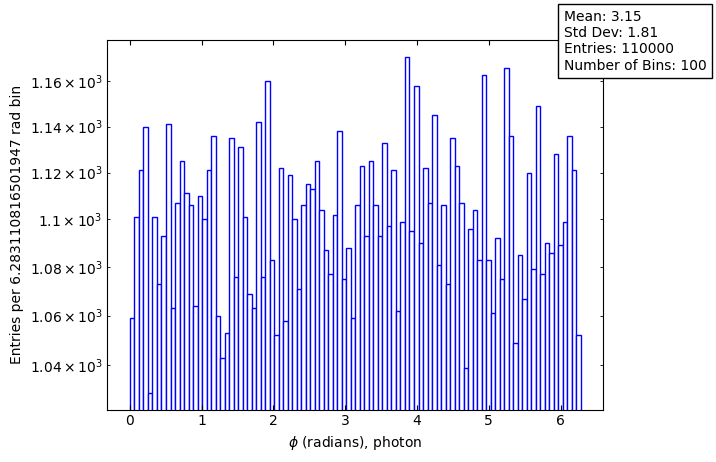

<Figure size 640x480 with 0 Axes>

In [107]:
# loop for making histograms for all the data that involves one plot for jet, one plot for photon

jet_arrays = [px_jet, py_jet, pz_jet, p_jet, E_jet, pT_jet, theta_jet, phi_jet]

photon_arrays = [px_photon, py_photon, pz_photon, p_photon, E_photon, pT_photon, theta_photon, phi_photon]

names = ['px', 'py', 'pz', 'p', 'E', 'pT', 'theta', 'phi']

labels = [r'$p_{x}$ (TeV)', r'$p_{y}$ (TeV)', r'$p_{z}$ (TeV)', r'$p$ (TeV)', r'$E$ (TeV)', \
          r'$p_{T}$ (TeV)', r'$\theta$ (radians)', r'$\phi$ (radians)']

for i in range(len(jet_arrays)):

    histogram(photon_arrays[i], jet_arrays[i], names[i], labels[i], 'log', '7p6Ms')

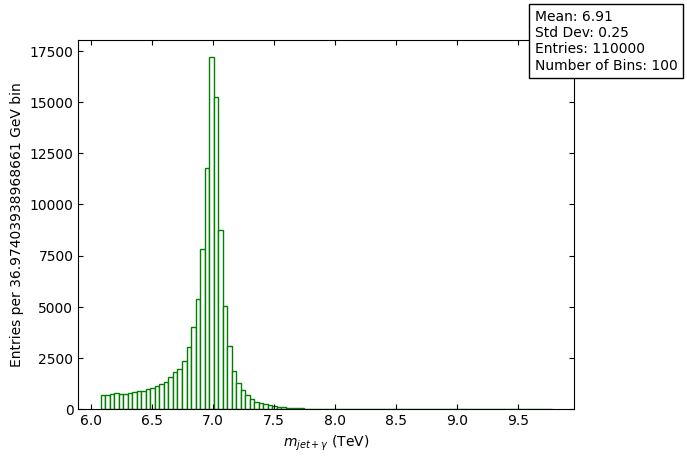

<Figure size 640x480 with 0 Axes>

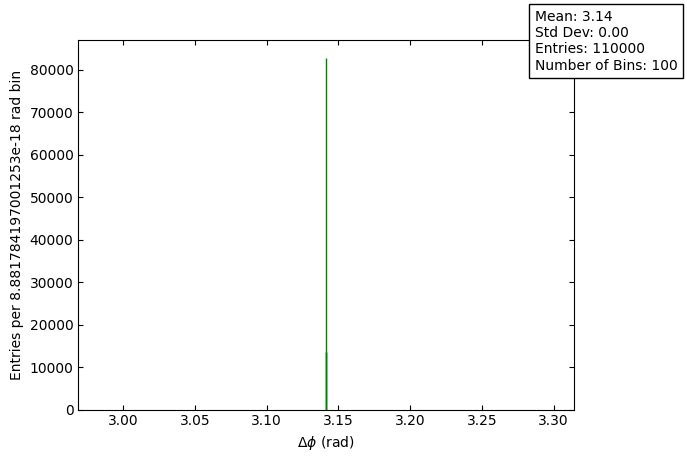

<Figure size 640x480 with 0 Axes>

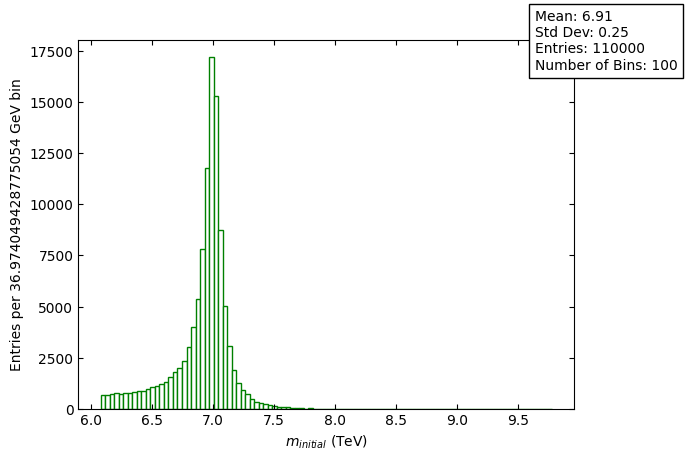

<Figure size 640x480 with 0 Axes>

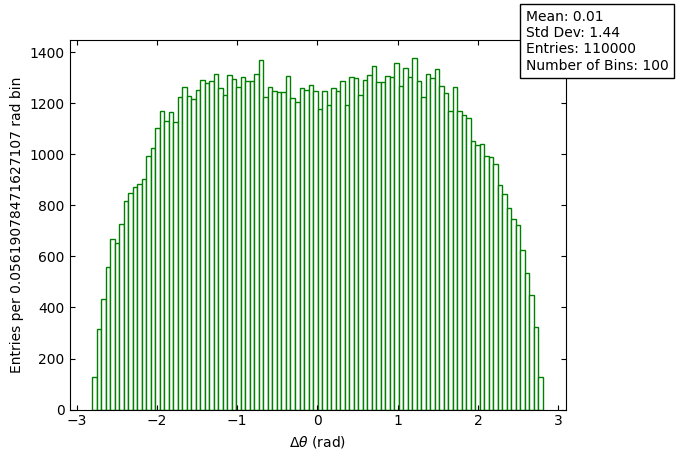

<Figure size 640x480 with 0 Axes>

In [110]:
# Get the arrays that involve the jet and the photon

array = [mjgamma, m_initial]
angleArray = [del_phi, del_theta]
arrayLabel = ['$m_{jet+\gamma}$ (TeV)', '$m_{initial}$ (TeV)']
angleLabel = [r'$\Delta \phi$ (rad)', r'$\Delta \theta$ (rad)']
arrayName = ['mjgamma.pdf', 'm_initial.pdf']
angleName = ['del_phi.pdf', 'del_theta.pdf']

for i in range(len(angleName)):
    moreArray(array[i], angleArray[i], arrayLabel[i], angleLabel[i], arrayName[i], angleName[i], '7p6Ms', 'lin')

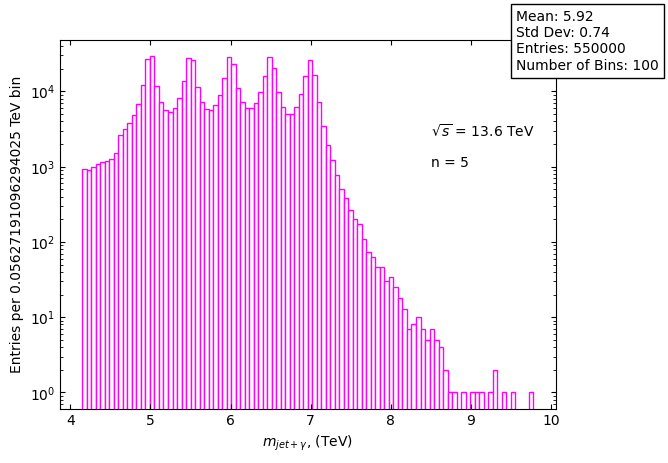

<Figure size 640x480 with 0 Axes>

In [52]:
# Script for making a histogram of all the masses superimposed on eachother

masses1 = np.concatenate((mjgamma1, mjgamma2, mjgamma3))
masses2 = np.concatenate((mjgamma4, mjgamma5))
masses = np.concatenate((masses1, masses2))

fig, ax = plt.subplots()
ax.hist(masses, bins=100, color='white', edgecolor='magenta', alpha=1)

binsize = ( max(masses)-min(masses) )/100
string = str(binsize)

ax.set_xlabel('$m_{jet + \gamma}$, (TeV)')
ax.set_ylabel('Entries per ' + string + ' TeV bin')
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_yscale('log')

mean = np.mean(masses)
std_dev = np.std(masses)
num_entries = len(masses)

ax.text(0.92, 0.92, f"Mean: {mean:.2f}\nStd Dev: {std_dev:.2f}\nEntries: {num_entries}\nNumber of Bins: {100}", \
transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
plt.text(8.5, 2.5e3, r'$\sqrt{s}$ = 13.6 TeV')
plt.text(8.5, 1e3, 'n = 5')

plt.savefig('./Histograms/13p6TeVlog.pdf',dpi=100,bbox_inches='tight',format='pdf')
plt.show()
plt.clf()

In [23]:
h = [1,2,3,4]
f = [4,5,6]

matrix = np.vstack((h,f))
print(matrix)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 3